In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [31]:
# Load the CSV files
train_df = pd.read_csv('C:/Users/keshav/Videos/mm/LPV/dataset/fashion_dataset/fashion-mnist_train.csv')
test_df = pd.read_csv('C:/Users/keshav/Videos/mm/LPV/dataset/fashion_dataset/fashion-mnist_test.csv')

# Extract labels and pixel values
y_train = train_df['label'].values
x_train = train_df.drop('label', axis=1).values
y_test = test_df['label'].values
x_test = test_df.drop('label', axis=1).values

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape images to (28, 28, 1) for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define class names for the 10 categories
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Verify data shapes
print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

x_train shape: (60000, 28, 28, 1), y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1), y_test shape: (10000,)


In [33]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(10, activation='softmax')  # 10 classes
])

C:\Users\keshav\Videos\env\tfvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.6534 - loss: 0.9451 - val_accuracy: 0.8489 - val_loss: 0.4088
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8385 - loss: 0.4496 - val_accuracy: 0.8828 - val_loss: 0.3244
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8651 - loss: 0.3743 - val_accuracy: 0.8892 - val_loss: 0.3020
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8802 - loss: 0.3319 - val_accuracy: 0.8956 - val_loss: 0.2814
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8896 - loss: 0.3085 - val_accuracy: 0.9046 - val_loss: 0.2665
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8972 - loss: 0.2816 - val_accuracy: 0.9064 - val_loss: 0.2621
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9030 - loss: 0.2647 - val_accuracy: 0.9079 - val_loss: 0.2578
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9093 - loss: 0.2480 - 

C:\Users\keshav\Videos\env\tfvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# Display model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 392,672 (1.50 MB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 261,782 (1022.59 KB)

In [41]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9115 - loss: 0.2557
Test accuracy: 0.9136


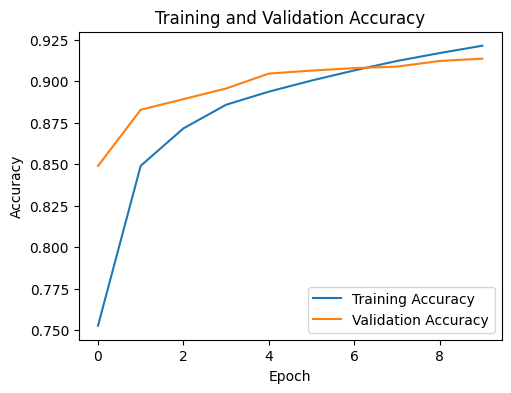

In [43]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

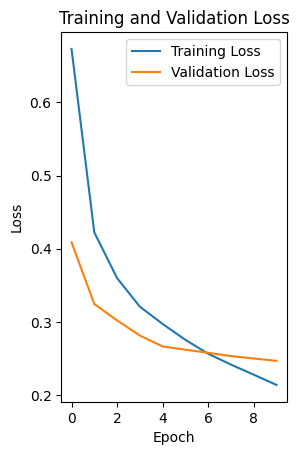

In [45]:
# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


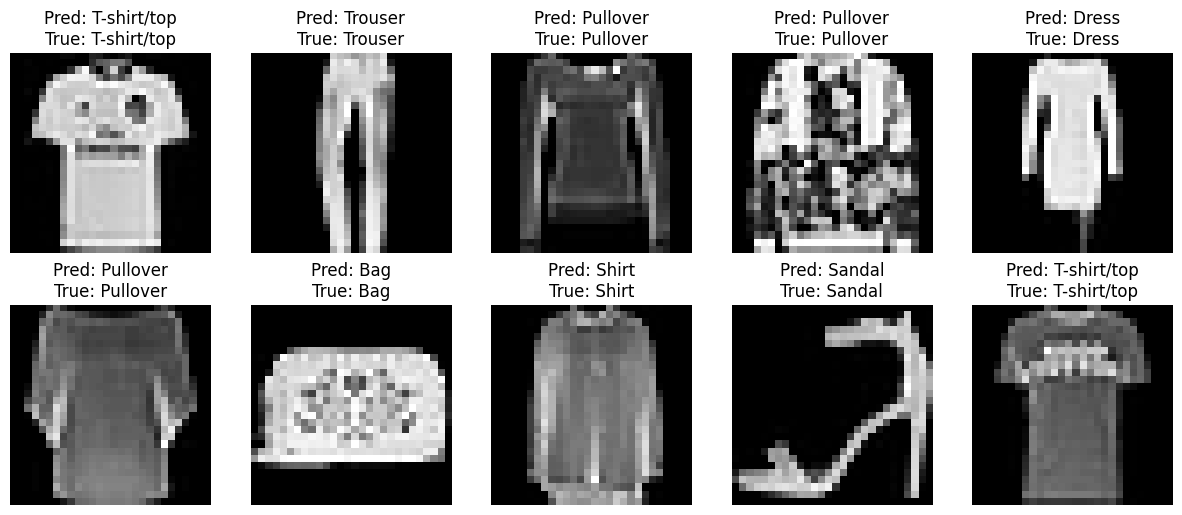

In [71]:
# Predict on the first 10 test images
predictions = model.predict(x_test[:10])

# Display predictions
plt.figure(figsize=(15, 6))  # Adjusted figure size for 10 images
for i in range(10):
    plt.subplot(2, 5, i+1)  # 2 rows, 5 columns
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {class_names[predicted_label]}\nTrue: {class_names[true_label]}')
    plt.axis('off')
plt.show()


Sample Predictions:
Image 1:
Predicted: Ankle boot (Probability: 1.0000)
True Label: Ankle boot

Image 2:
Predicted: Pullover (Probability: 1.0000)
True Label: Pullover

Image 3:
Predicted: Trouser (Probability: 1.0000)
True Label: Trouser

Image 4:
Predicted: Trouser (Probability: 1.0000)
True Label: Trouser

Image 5:
Predicted: Shirt (Probability: 0.5829)
True Label: Shirt



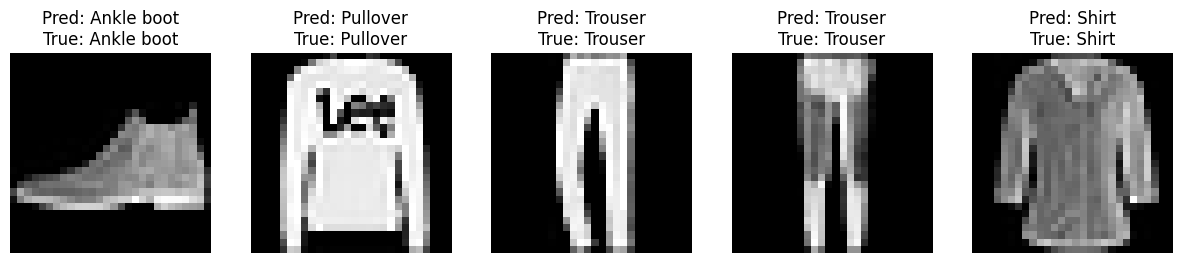

In [79]:
# Sample predictions (first 5 test images)
print("\nSample Predictions:")
predictions = model.predict(test_images[:5], verbose=0)

# Create a figure for displaying images
plt.figure(figsize=(15, 3))
for i in range(5):
    # Get prediction details
    pred_label = np.argmax(predictions[i])
    prob = predictions[i][pred_label]
    true_label = test_labels[i]
    
    # Print prediction details
    print(f"Image {i+1}:")
    print(f"Predicted: {class_names[pred_label]} (Probability: {prob:.4f})")
    print(f"True Label: {class_names[true_label]}\n")
    
    # Display the image
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {class_names[pred_label]}\nTrue: {class_names[true_label]}')
    plt.axis('off')

plt.show()
